In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [69]:
image = cv2.imread("table.jpg")

image = cv2.resize(image,(1000,800))

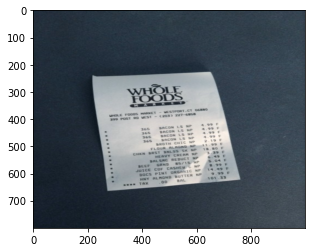

In [70]:
plt.imshow(image)
plt.show()

In [71]:
orig = image.copy()

In [72]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [73]:
# cv2.imshow("Title",gray)

In [74]:
blurred = cv2.GaussianBlur(gray,(5,5),0)

# Here (5,5) is kernel size which create a matrix of 5*5 which is gonna mould over the original image and and get matrix multiplication and the 0 is for blur we are not sure how much we want to blur it so we just give 0 to it and the library will handle it

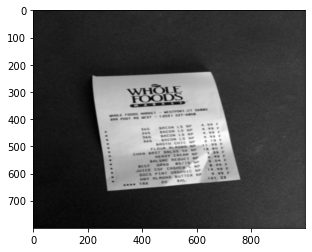

In [75]:
plt.imshow(blurred,cmap="gray")
plt.show()

### Now after smoothing we now gonna get the edges using Canny

### Now we decide the min max values on this basis we are gonna decide that the curves which are in b/w these value of 30-50 are gonna consider as curves and the other are not

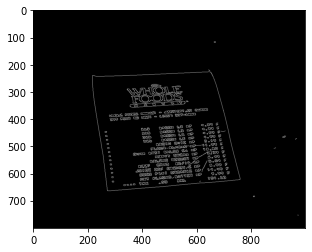

In [76]:
edged = cv2.Canny(blurred,30,50)
plt.imshow(edged,cmap="gray")
plt.show()

#### now here are gonna get the contours ,image and heirarchy here"cv2.RETR_LIST" is the method in which it is gonna return the list and "CV2.CHAIN_APPROX_SIMPLE" is the method that it is gonna consider only simple points not all the points which are reduntant ones for considering all thepoints or we say them contours there is method known as "CV2.CHAIN_APPROX_NONE"

In [77]:
contours,hierarchy = cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

### Now we are gonna sort our contours on the basis of bounday are because our main aim is to extract the papers on the basis of rectangle and square

In [78]:
contours = sorted(contours,key=cv2.contourArea,reverse=True)

In [79]:
for c in contours:
    #arcLen help us to detect square and rectangle in image
    #True means it is finding square or closed shape if it is false it will find lines 
    p=cv2.arcLength(c,True)
    #so now what the arcLength return will not be a perfect square so we use cv2.approxPolyDP here 0.02 is the epsilon value
    # and True is for same above reason
    approx = cv2.approxPolyDP(c,0.02*p,True)
    # now if return 4 edges than it is a square
    if len(approx)==4:
        target=approx
        break

### Now that we have found our boundaries we have to find our four points of the image so this is accomplished using get_perspective _transform function in which we can not supply our contours directly so we use pyimagesearch tutorial

In [80]:
def mapp(h):
    h=h.reshape((4,2))
    hnew = np.zeros((4,2),dtype=np.float32)
    
    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]
    
    diff = np.diff(h,axis=1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]
    
    return hnew

# Now we are gonna provide it with our final contours

In [81]:
approx = mapp(target)

In [82]:
pts = np.float32([[0,0],[800,0],[800,800],[0,800]])

##### Here pts i sboundary size

In [83]:
op = cv2.getPerspectiveTransform(approx,pts)

### it takes orignal image output of the getPerspectiveTransform and output size that is gonna be(800,800)

In [84]:
dst = cv2.warpPerspective(orig,op,(800,800))

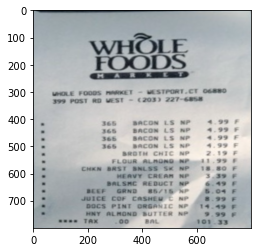

In [85]:
plt.imshow(dst)
plt.show()

# Scanning Finish

In [1]:
# pip install imutils
# !pip install torch

In [14]:
import cv2
import os
import imutils
import matplotlib.pyplot as plt

# Image Generation

In [426]:
# from keras.preprocessing import image

In [428]:
# # imgen = image.ImageDataGenerator(width_shift_range = 0.1,height_shift_range = 0.1,shear_range = 0.2,zoom_range=0.2,
#                                  rotation_range=20)

In [429]:
# path = "number/54 (2).jpg"

In [430]:
# img = image.load_img(path, target_size=(50,50))
# img = image.img_to_array(img)/255.

In [431]:
# img = img.reshape(1, 50,50,3)

In [424]:
# arr = imgen.flow(img,batch_size=10,save_to_dir="./sace_img/",save_prefix="aug",save_format='jpg')

In [432]:
# i=0
# for batch in imgen.flow(img, batch_size = 1, 
#                       save_to_dir ='sace_img',  
#                       save_prefix ='aug', save_format ='jpg'):
#         i += 1
#         if i > 10: 
#             break

In [106]:

# c = 0
# for i in arr:
#     if c==10:
#         break
# #     print(i[0].shape)
#     plt.imshow(i[0].reshape(50,50,3))
#     plt.show()
# #     plt.savefig("sace_img/{}.jpg".format(c))
#     c+=1

In [7]:
# n=0
# "i{}".format(n)

In [23]:
image.ImageDataGenerator?

In [8]:
# classes = ["apostrophe","capitalize","colon","comma","exclamation mark","hyphen","period or decimal point","question mark"
#           ,"semicolon"]

In [9]:
# os.mkdir("val_symbol")

In [10]:
# for c in classes:
#     if not os.path.isdir("val_symbol/"+c):
#         os.mkdir("val_symbol/"+c)

In [11]:
# split = 0.9
# for dirc in os.listdir("symbol"):
#     p = "symbol/" + dirc
#     imgs = os.listdir(p)
#     split_imgs = int(len(imgs)*split)
#     files_to_move = imgs[split_imgs:]
#     for f in files_to_move:
#         src = os.path.join(p,f)
#         dest = os.path.join("val_symbol/",dirc)
#         shutil.move(src,dest)

In [15]:
import os,shutil
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# if not os.path.isdir("val_images"):
#     os.mkdir("val_images")

In [14]:
# classes = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","space"]

In [15]:
# len(classes)

In [16]:
# for c in classes:
#     if not os.path.isdir("val_images/"+c):
#         os.mkdir("val_images/"+c)

In [17]:
# split = 0.9
# for dirc in os.listdir("train_images"):
#     p = "train_images/" + dirc
#     imgs = os.listdir(p)
#     split_imgs = int(len(imgs)*split)
#     files_to_move = imgs[split_imgs:]
#     for f in files_to_move:
#         src = os.path.join(p,f)
#         dest = os.path.join("val_images/",dirc)
#         shutil.move(src,dest)

In [18]:
# os.mkdir("test_num")

In [19]:
# split = 0.9
# space = os.listdir("number//")
# split_imgs = int(len(space)*split)
# files_to_move = space[split_imgs:]
# for f in files_to_move:
#     src = os.path.join("number/",f)
#     shutil.move(src,"test_num/")

In [16]:
for dirc in os.listdir("train_images/"):
    p = "train_images/" + dirc
    img = os.listdir(p)
    print(dirc,len(img))

a 1096
apostrophe 783
b 818
c 873
capitalize 820
colon 801
comma 729
d 1024
e 1024
exclamation mark 719
f 880
g 906
h 873
hyphen 753
i 873
j 868
k 865
l 888
m 878
n 918
number 907
o 890
p 880
period or decimal point 753
q 895
question mark 762
r 951
s 875
semicolon 518
space 1031
t 792
u 759
v 792
w 792
x 792
y 798
z 792


In [17]:
for dirc in os.listdir("val_images/"):
    p = "val_images/" + dirc
    img = os.listdir(p)
    print(dirc,len(img))

a 122
apostrophe 88
b 91
c 97
capitalize 92
colon 89
comma 82
d 114
e 114
exclamation mark 80
f 98
g 101
h 97
hyphen 84
i 98
j 97
k 97
l 99
m 98
n 102
number 152
o 99
p 98
period or decimal point 84
q 100
question mark 85
r 106
s 98
semicolon 58
space 115
t 88
u 85
v 89
w 88
x 88
y 89
z 88


# Image Augmentation

In [19]:
from keras.preprocessing import image

Using TensorFlow backend.


In [20]:
train_datagen = image.ImageDataGenerator(rotation_range=10,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         shear_range = 0.1,
                                         zoom_range=0.1,
                                        rescale = 1/255)

In [21]:
val_datagen = image.ImageDataGenerator(rescale = 1/255)

In [22]:
train_generator = train_datagen.flow_from_directory("train_images/",
                                                   target_size=(50,50),
                                                   class_mode="categorical",
                                                   shuffle=True,
                                                   batch_size=32)

Found 31366 images belonging to 37 classes.


In [23]:
train_generator.class_indices

{'a': 0,
 'apostrophe': 1,
 'b': 2,
 'c': 3,
 'capitalize': 4,
 'colon': 5,
 'comma': 6,
 'd': 7,
 'e': 8,
 'exclamation mark': 9,
 'f': 10,
 'g': 11,
 'h': 12,
 'hyphen': 13,
 'i': 14,
 'j': 15,
 'k': 16,
 'l': 17,
 'm': 18,
 'n': 19,
 'number': 20,
 'o': 21,
 'p': 22,
 'period or decimal point': 23,
 'q': 24,
 'question mark': 25,
 'r': 26,
 's': 27,
 'semicolon': 28,
 'space': 29,
 't': 30,
 'u': 31,
 'v': 32,
 'w': 33,
 'x': 34,
 'y': 35,
 'z': 36}

In [24]:
val_generator = val_datagen.flow_from_directory("val_images/",
                                               target_size=(50,50),
                                               class_mode="categorical",
                                               batch_size=32)

Found 3549 images belonging to 37 classes.


# Model Architecture

In [25]:
from keras.layers import SeparableConv2D,MaxPool2D,GlobalAvgPool2D,Input,Dense,Dropout,BatchNormalization,Flatten
from keras.models import Sequential
from keras.utils import to_categorical

In [26]:
model = Sequential()
model.add(SeparableConv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(50,50,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(SeparableConv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(GlobalAvgPool2D())
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=37,activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 48, 48, 32)        155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 22, 22, 128)       4512      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 9, 9, 128)         17664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)        

In [28]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# Model Training

In [575]:
# hist = model.fit_generator(train_generator,steps_per_epoch=31366//32,epochs=2,
#                            validation_data=val_generator,validation_steps=3549//32)

In [462]:
# model.save("best_model1.h5")

In [29]:
model.load_weights("best_model1.h5")

In [30]:
import numpy as np

In [31]:
# img.shape

In [32]:
# pip install Pillow

In [33]:
dicti ={'a': 0,
 'apostrophe': 1,
 'b': 2,
 'c': 3,
 'capitalize': 4,
 'colon': 5,
 'comma': 6,
 'd': 7,
 'e': 8,
 'exclamation mark': 9,
 'f': 10,
 'g': 11,
 'h': 12,
 'hyphen': 13,
 'i': 14,
 'j': 15,
 'k': 16,
 'l': 17,
 'm': 18,
 'n': 19,
 'number': 20,
 'o': 21,
 'p': 22,
 'period or decimal point': 23,
 'q': 24,
 'question mark': 25,
 'r': 26,
 's': 27,
 'semicolon': 28,
 'space': 29,
 't': 30,
 'u': 31,
 'v': 32,
 'w': 33,
 'x': 34,
 'y': 35,
 'z': 36}

In [34]:
rev_dic = {}
c = 0
for i in dicti.keys():
    rev_dic[c] = i
    c+=1

In [35]:
rev_dic

{0: 'a',
 1: 'apostrophe',
 2: 'b',
 3: 'c',
 4: 'capitalize',
 5: 'colon',
 6: 'comma',
 7: 'd',
 8: 'e',
 9: 'exclamation mark',
 10: 'f',
 11: 'g',
 12: 'h',
 13: 'hyphen',
 14: 'i',
 15: 'j',
 16: 'k',
 17: 'l',
 18: 'm',
 19: 'n',
 20: 'number',
 21: 'o',
 22: 'p',
 23: 'period or decimal point',
 24: 'q',
 25: 'question mark',
 26: 'r',
 27: 's',
 28: 'semicolon',
 29: 'space',
 30: 't',
 31: 'u',
 32: 'v',
 33: 'w',
 34: 'x',
 35: 'y',
 36: 'z'}

In [36]:
from PIL import Image

In [114]:
test_img = Image.open("test/CNN model.png")
test_img = test_img.convert("RGB")
total_width,height = test_img.size
n_chars = int(total_width/height/0.78)

width_ind = total_width/n_chars
print(n_chars)
print(total_width,height)
print(width_ind)

10
281 33
28.1


In [38]:
npimg1 = np.array(test_img)

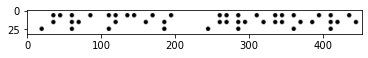

In [39]:
plt.imshow(npimg1[:,:,:])
plt.show()

In [143]:
test_img1 = Image.open("para.jpeg")
test_img1 = test_img1.convert("RGB")
total_width1,height1 = test_img1.size
n_chars1 = int(total_width1/height1/0.20)

height_ind1 = height1/n_chars1
print(height1,total_width1)
print(n_chars1)
print(height_ind1)

720 1098
7
102.85714285714286


In [144]:
# np_img = np.array(test_img1)

In [145]:
# 134-95

199-159

40

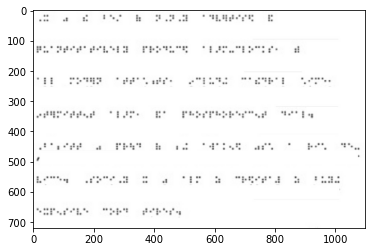

In [146]:
plt.imshow(np_img[:,:,:])
plt.show()

In [147]:
Image.fromarray?

In [170]:
test_img1 = Image.open("para.jpeg")
test_img1 = test_img1.convert("RGB")
total_width1,height1 = test_img1.size
n_chars1 = int(total_width1/height1/0.20)

height_ind1 = height1/n_chars1
print(height1,total_width1)
print(n_chars1)
print(height_ind1)

720 1098
7
102.85714285714286


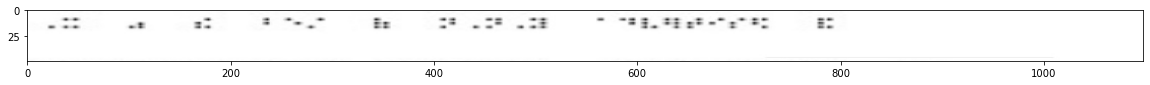

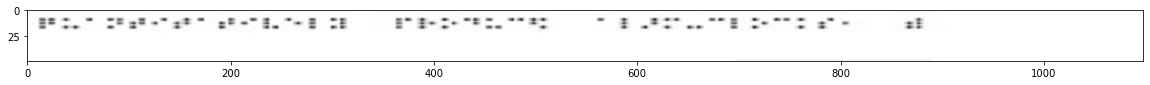

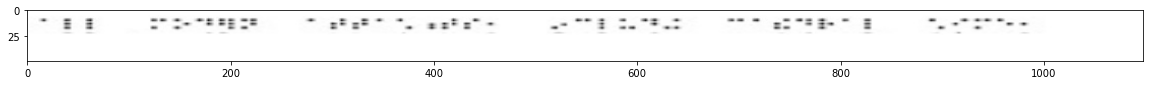

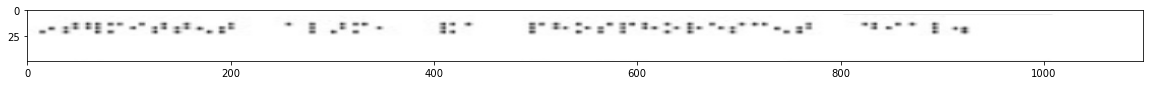

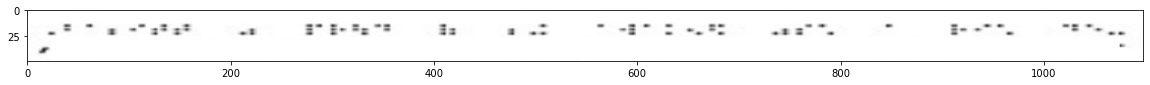

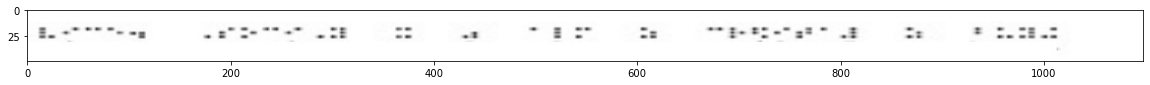

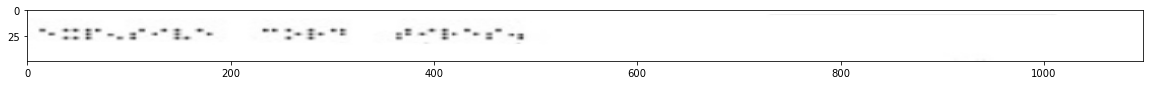

In [171]:
for i in range(0,int(n_chars1)):
    test_img = test_img1.crop((0,i*height_ind1,total_width1,(i+1)*height_ind1))
    test_img = np.array(test_img)
    test_img = cv2.resize(test_img,(test_img.shape[1],50))
    test_img = test_img.astype(np.float32)/255.0
    height,total_width,color = test_img.shape
    n_chars = int(total_width/height/0.48)
    width_ind = total_width/n_chars
    plt.figure(figsize=(20,10))
    plt.imshow(test_img)
    plt.show()

50 1098
28


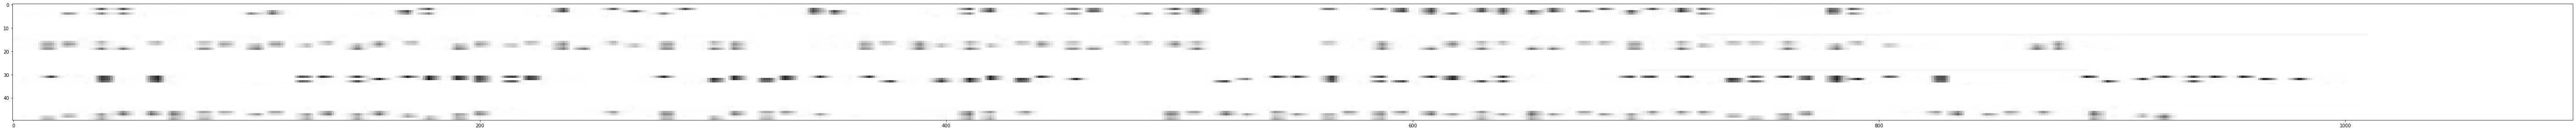

50 1098
28


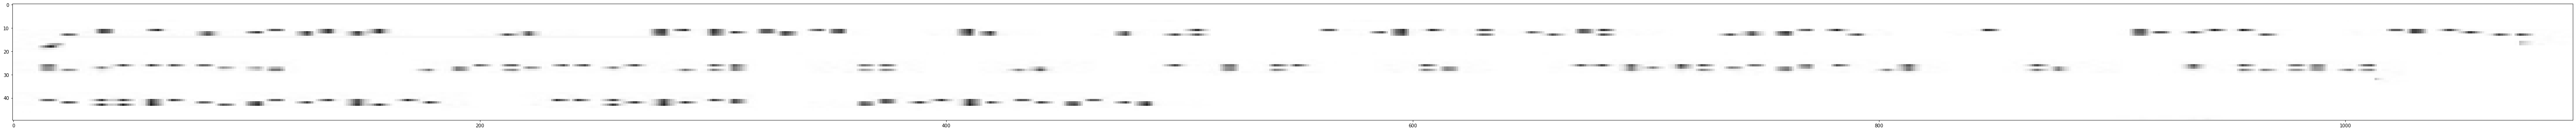

In [135]:
# for i in range(0,int(n_chars1)):
#     test_img = test_img1.crop((0,i*height_ind1,total_width1,(i+1)*height_ind1))
#     test_img = np.array(test_img)
#     test_img = cv2.resize(test_img,(test_img.shape[1],50))
#     test_img = test_img.astype(np.float32)/255.0
# #     print(test_img.shape)
# #     test_img = Image.fromarray(test_img)
#     height,total_width,color = test_img.shape
#     print(height,total_width)
# #     test_img = np.array(test_img)
#     n_chars = int(total_width/height/0.78)
#     print(n_chars)
#     width_ind = total_width/n_chars
# #     print(test_img.shape)
#     plt.figure(figsize=(100,5))
# #     cropped1 = cropped1.reshape(1,50,50,3)
#     plt.imshow(test_img)
#     plt.show()

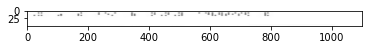

(50, 30, 3)


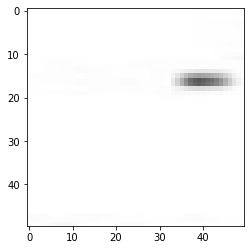

(50, 31, 3)


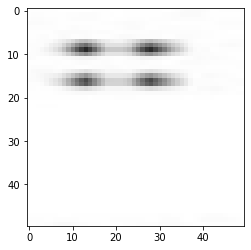

(50, 30, 3)


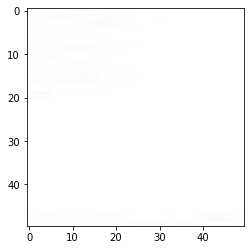

(50, 31, 3)


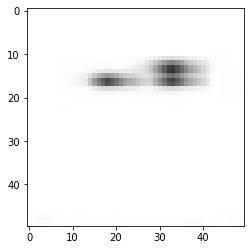

(50, 30, 3)


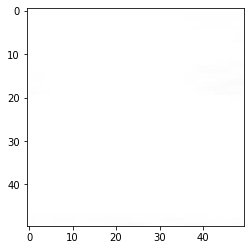

(50, 31, 3)


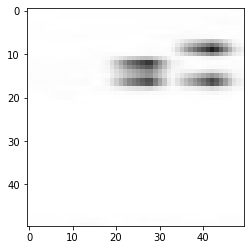

(50, 30, 3)


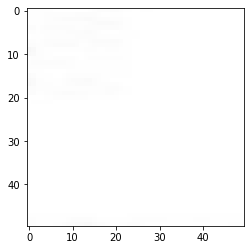

(50, 31, 3)


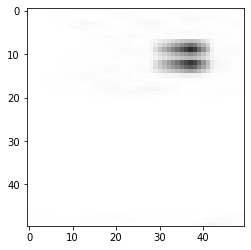

(50, 30, 3)


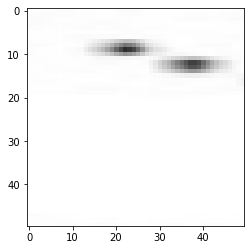

(50, 31, 3)


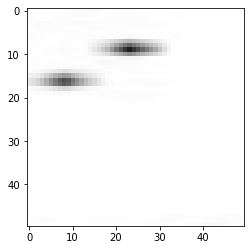

(50, 30, 3)


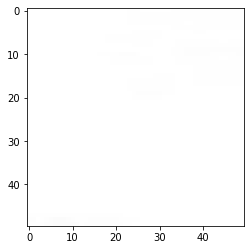

(50, 31, 3)


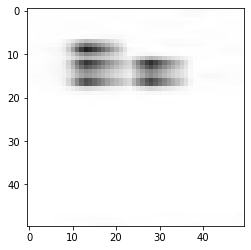

(50, 30, 3)


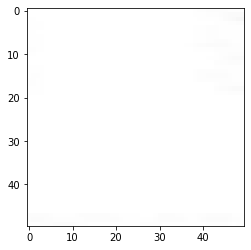

(50, 31, 3)


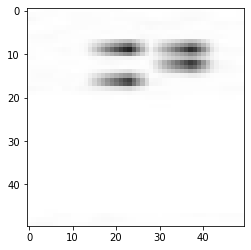

(50, 30, 3)


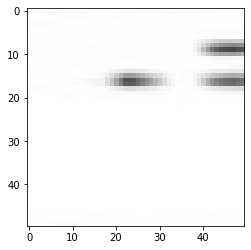

(50, 31, 3)


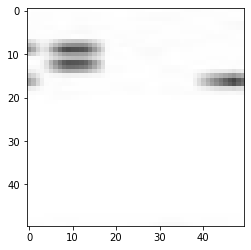

(50, 30, 3)


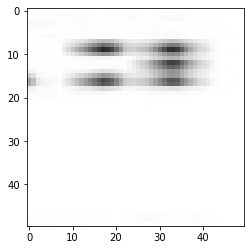

(50, 31, 3)


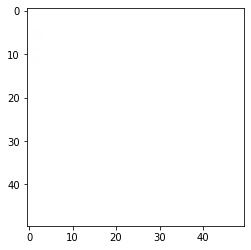

(50, 30, 3)


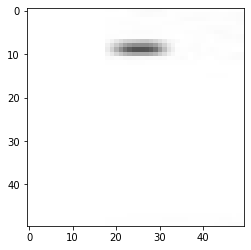

(50, 31, 3)


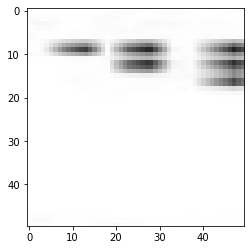

(50, 30, 3)


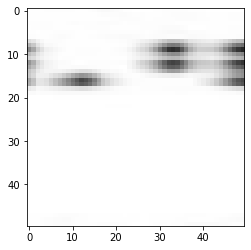

(50, 31, 3)


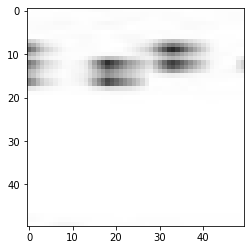

(50, 30, 3)


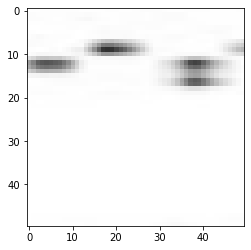

(50, 31, 3)


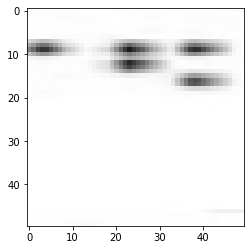

(50, 30, 3)


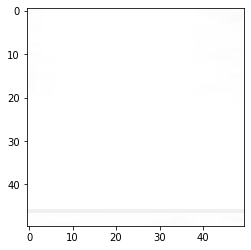

(50, 31, 3)


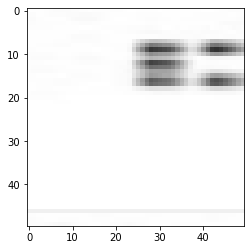

(50, 30, 3)


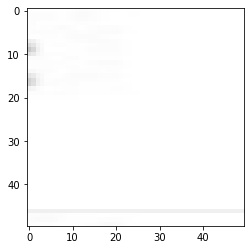

(50, 31, 3)


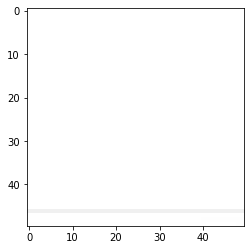

(50, 30, 3)


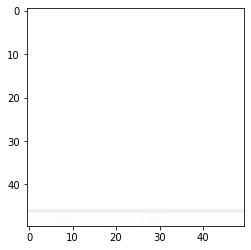

(50, 31, 3)


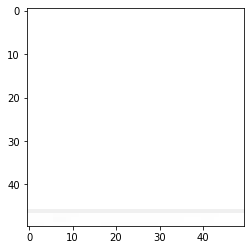

(50, 30, 3)


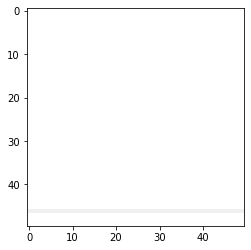

(50, 31, 3)


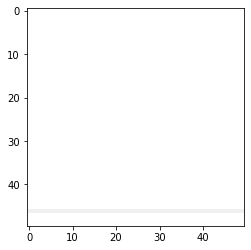

(50, 30, 3)


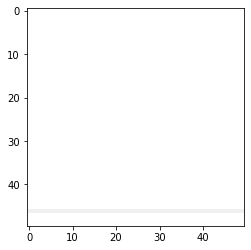

(50, 31, 3)


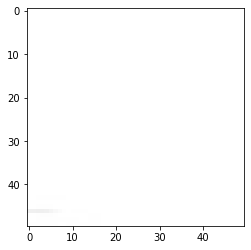

(50, 30, 3)


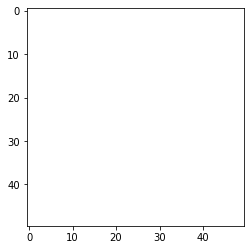

(50, 31, 3)


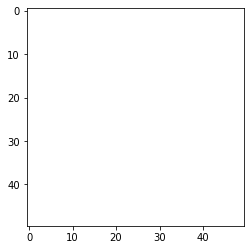

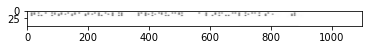

(50, 30, 3)


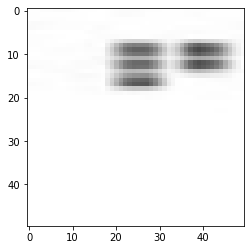

(50, 31, 3)


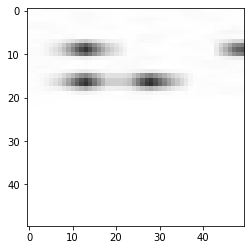

(50, 30, 3)


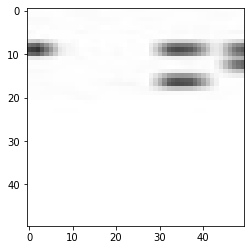

(50, 31, 3)


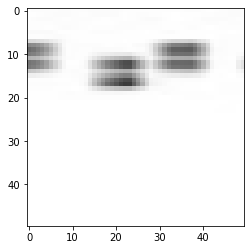

(50, 30, 3)


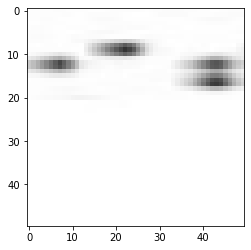

(50, 31, 3)


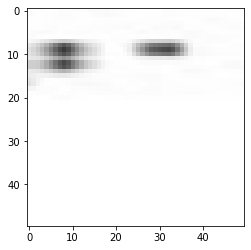

(50, 30, 3)


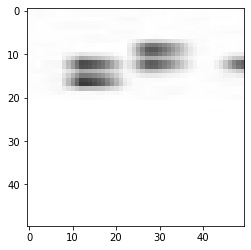

(50, 31, 3)


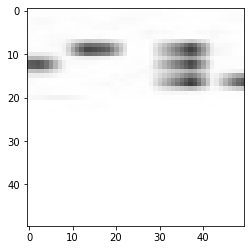

(50, 30, 3)


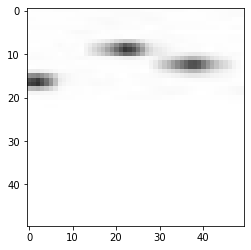

(50, 31, 3)


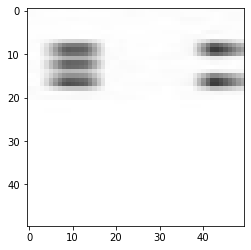

(50, 30, 3)


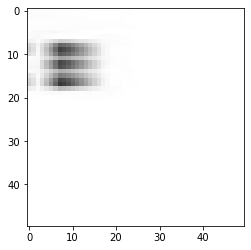

(50, 31, 3)


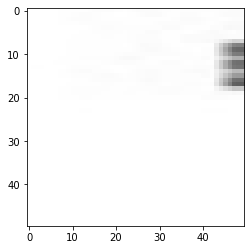

(50, 30, 3)


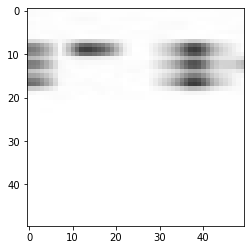

(50, 31, 3)


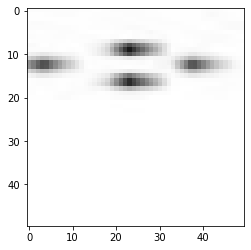

(50, 30, 3)


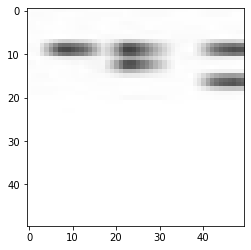

(50, 31, 3)


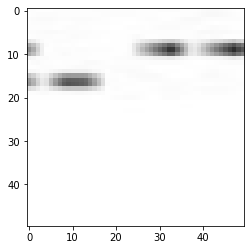

(50, 30, 3)


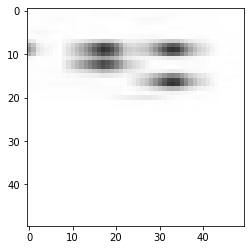

(50, 31, 3)


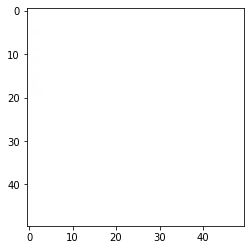

(50, 30, 3)


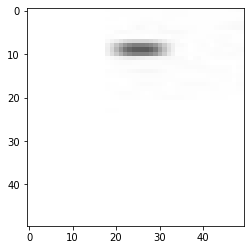

(50, 31, 3)


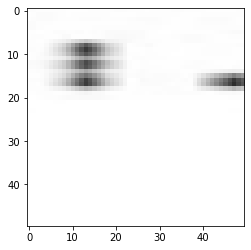

(50, 30, 3)


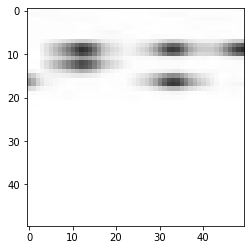

(50, 31, 3)


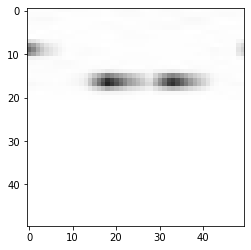

(50, 30, 3)


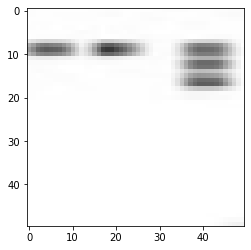

(50, 31, 3)


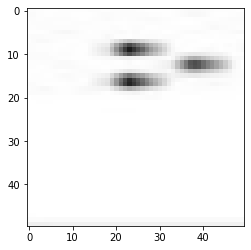

(50, 30, 3)


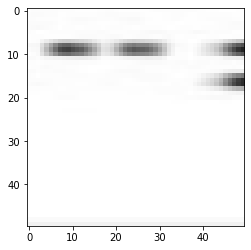

(50, 31, 3)


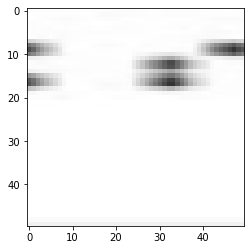

(50, 30, 3)


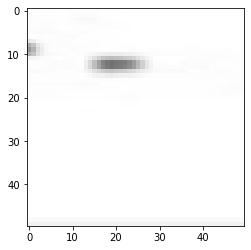

(50, 31, 3)


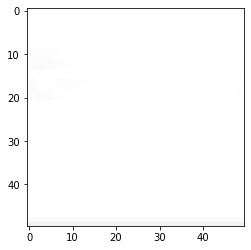

(50, 30, 3)


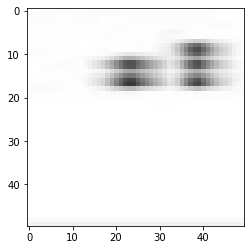

(50, 31, 3)


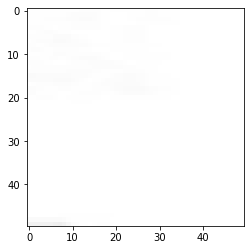

(50, 30, 3)


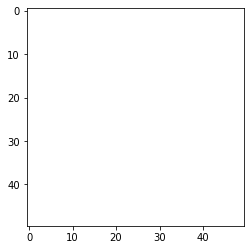

(50, 31, 3)


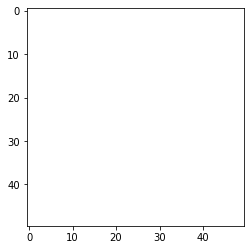

(50, 30, 3)


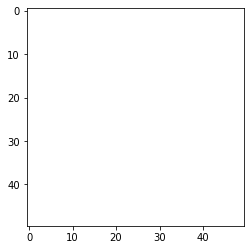

(50, 31, 3)


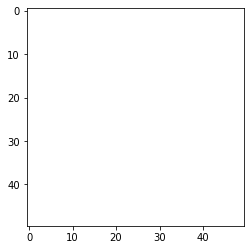

(50, 30, 3)


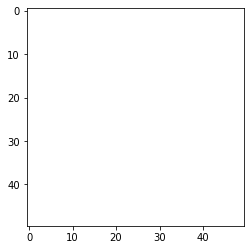

(50, 31, 3)


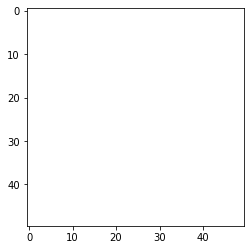

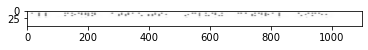

(50, 30, 3)


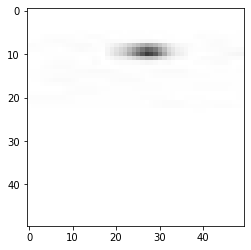

(50, 31, 3)


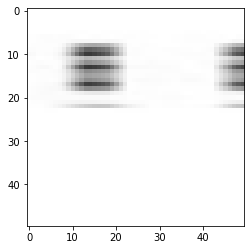

(50, 30, 3)


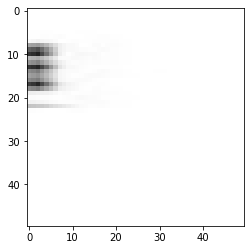

(50, 31, 3)


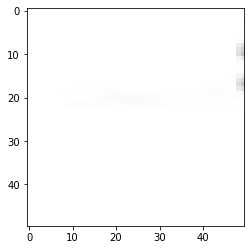

(50, 30, 3)


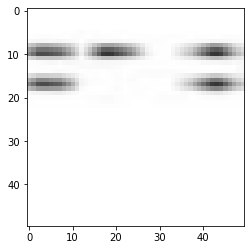

(50, 31, 3)


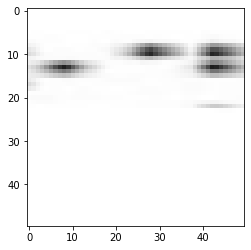

(50, 30, 3)


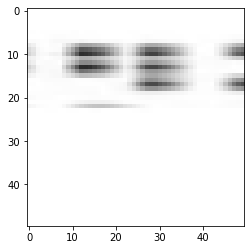

(50, 31, 3)


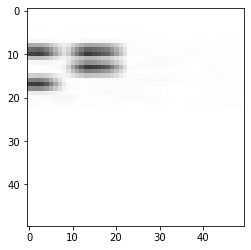

(50, 30, 3)


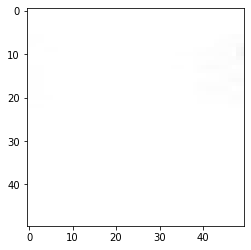

(50, 31, 3)


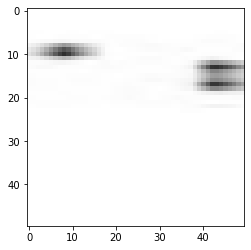

(50, 30, 3)


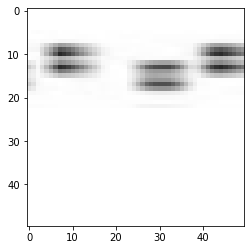

(50, 31, 3)


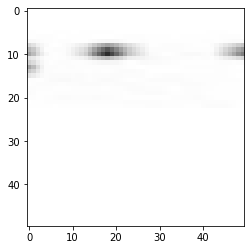

(50, 30, 3)


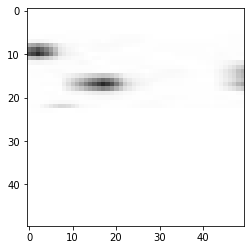

(50, 31, 3)


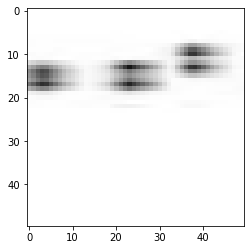

(50, 30, 3)


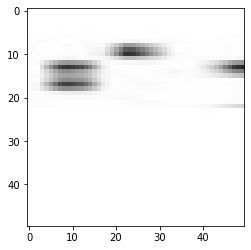

(50, 31, 3)


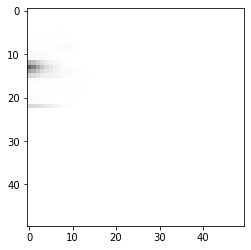

(50, 30, 3)


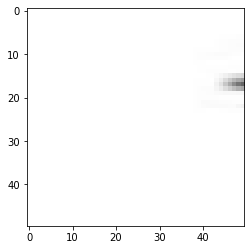

(50, 31, 3)


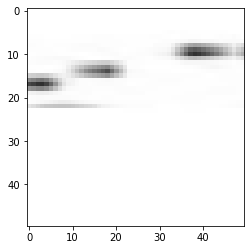

(50, 30, 3)


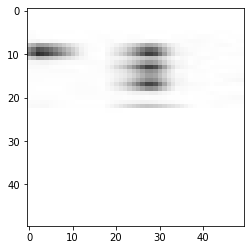

(50, 31, 3)


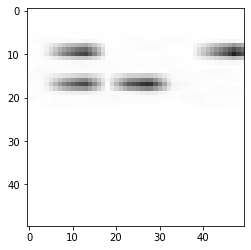

(50, 30, 3)


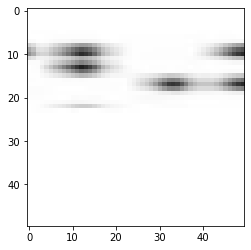

(50, 31, 3)


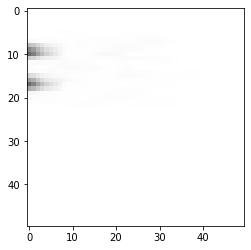

(50, 30, 3)


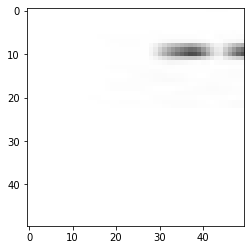

(50, 31, 3)


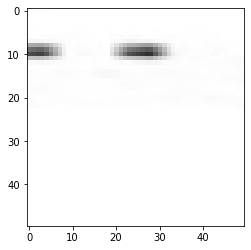

(50, 30, 3)


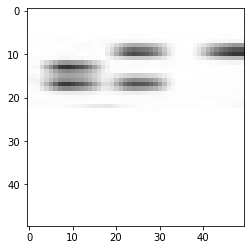

(50, 31, 3)


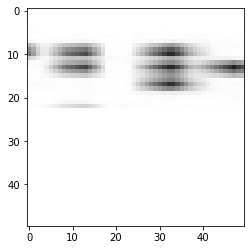

(50, 30, 3)


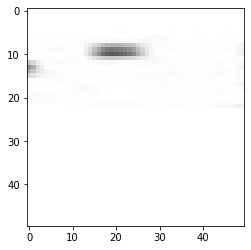

(50, 31, 3)


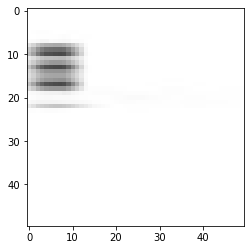

(50, 30, 3)


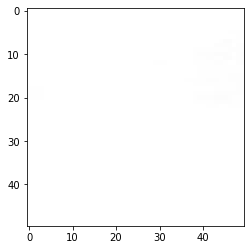

(50, 31, 3)


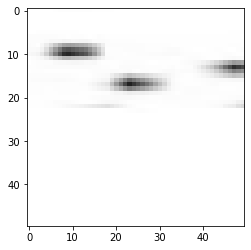

(50, 30, 3)


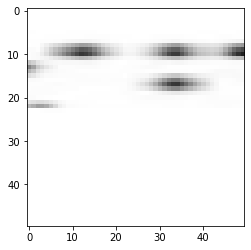

(50, 31, 3)


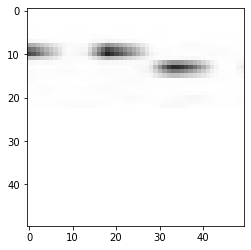

(50, 30, 3)


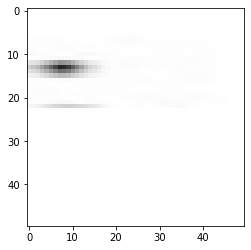

(50, 31, 3)


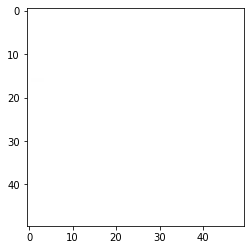

(50, 30, 3)


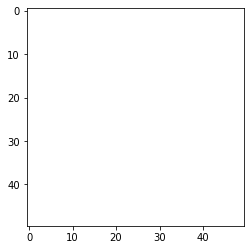

(50, 31, 3)


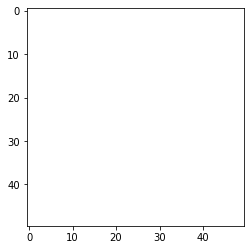

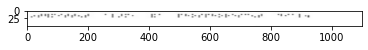

(50, 30, 3)


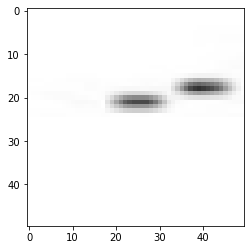

(50, 31, 3)


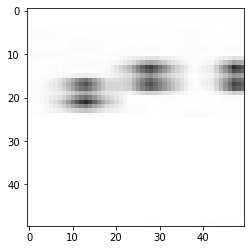

(50, 30, 3)


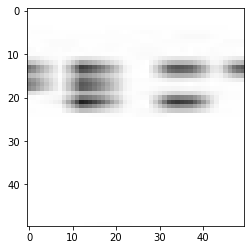

(50, 31, 3)


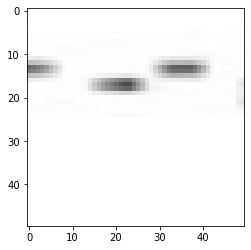

(50, 30, 3)


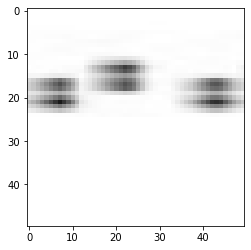

(50, 31, 3)


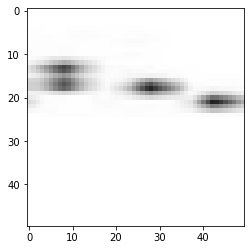

(50, 30, 3)


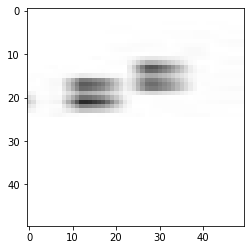

(50, 31, 3)


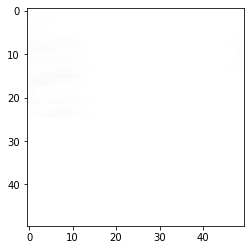

(50, 30, 3)


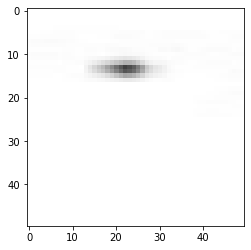

(50, 31, 3)


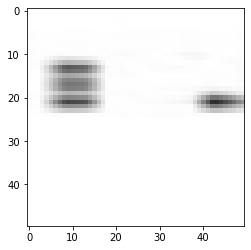

(50, 30, 3)


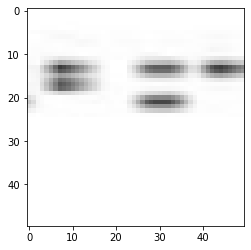

(50, 31, 3)


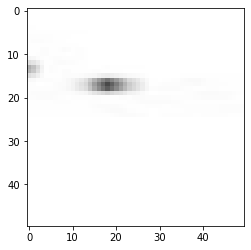

(50, 30, 3)


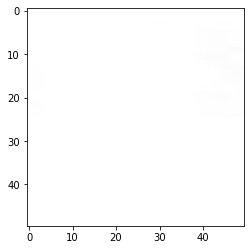

(50, 31, 3)


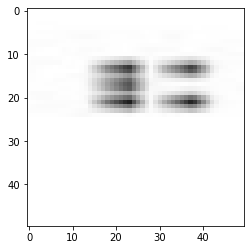

(50, 30, 3)


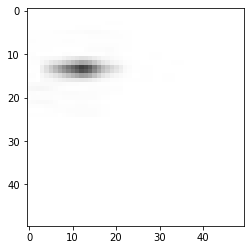

(50, 31, 3)


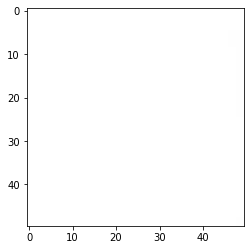

(50, 30, 3)


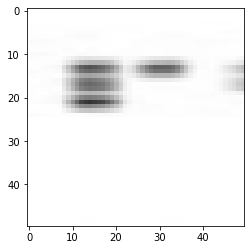

(50, 31, 3)


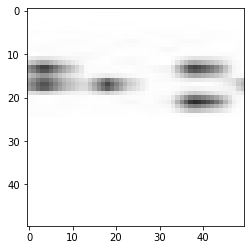

(50, 30, 3)


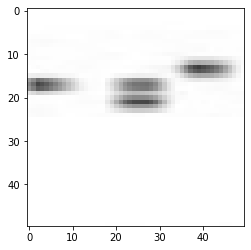

(50, 31, 3)


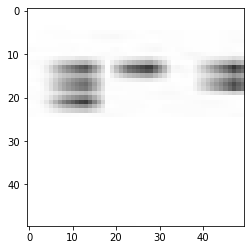

(50, 30, 3)


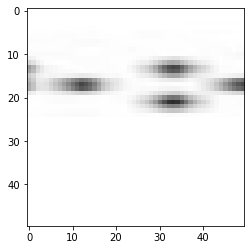

(50, 31, 3)


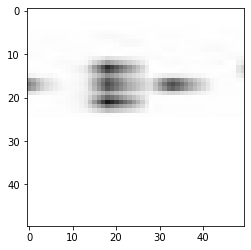

(50, 30, 3)


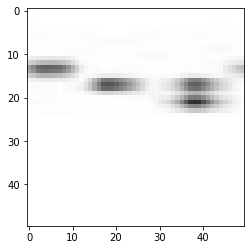

(50, 31, 3)


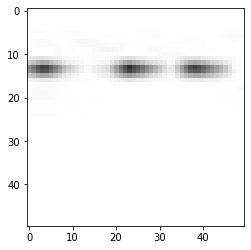

(50, 30, 3)


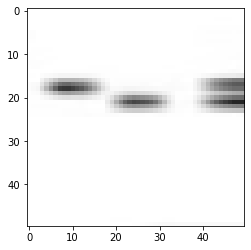

(50, 31, 3)


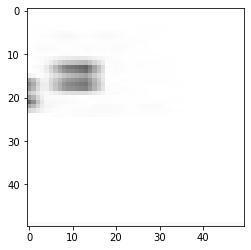

(50, 30, 3)


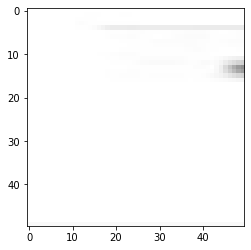

(50, 31, 3)


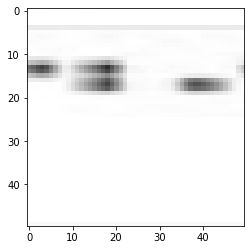

(50, 30, 3)


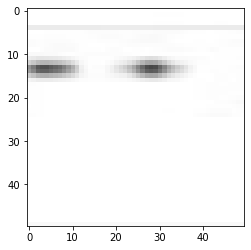

(50, 31, 3)


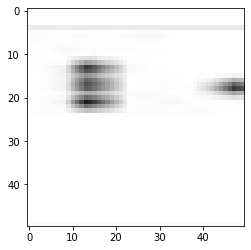

(50, 30, 3)


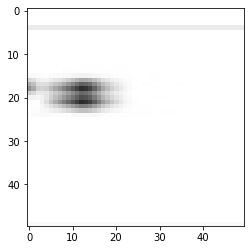

(50, 31, 3)


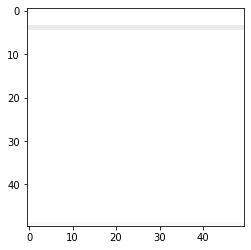

(50, 30, 3)


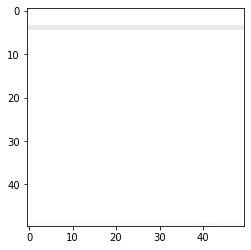

(50, 31, 3)


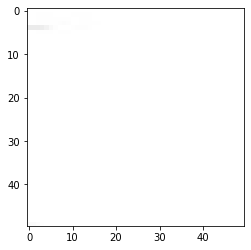

(50, 30, 3)


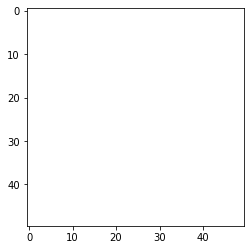

(50, 31, 3)


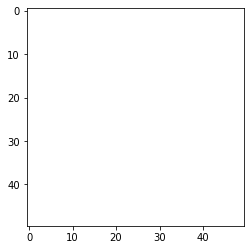

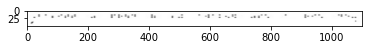

(50, 30, 3)


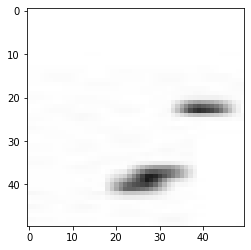

(50, 31, 3)


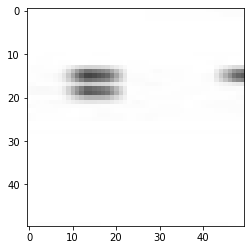

a
(50, 30, 3)


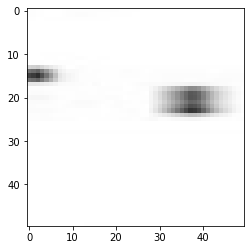

e
(50, 31, 3)


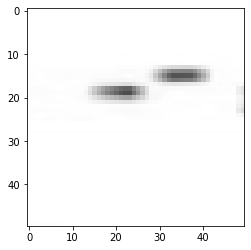

c
(50, 30, 3)


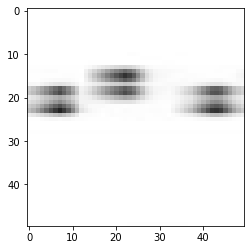

:
(50, 31, 3)


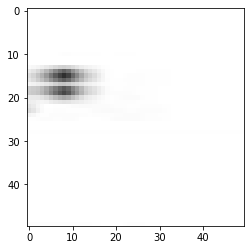

a
(50, 30, 3)


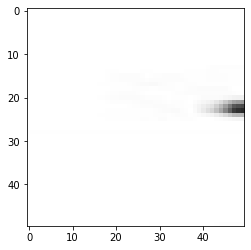

e
(50, 31, 3)


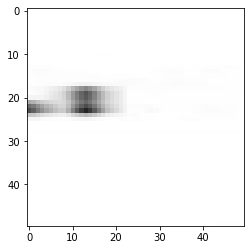

,
(50, 30, 3)


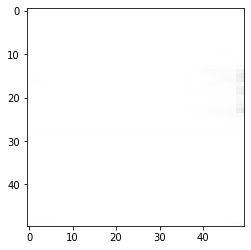

 
(50, 31, 3)


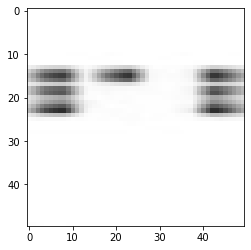

(50, 30, 3)


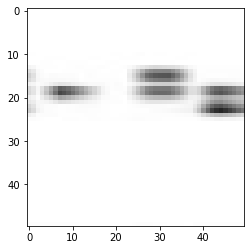

(50, 31, 3)


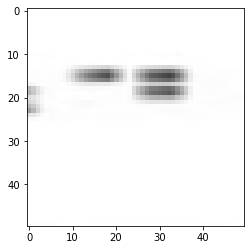

(50, 30, 3)


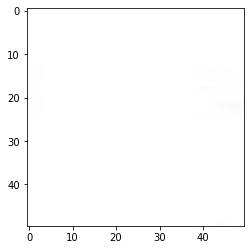

(50, 31, 3)


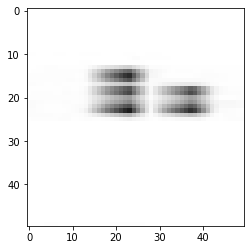

(50, 30, 3)


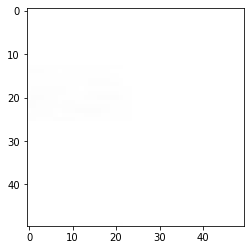

(50, 31, 3)


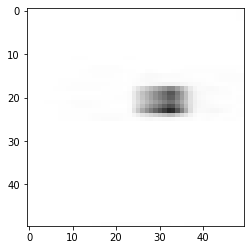

(50, 30, 3)


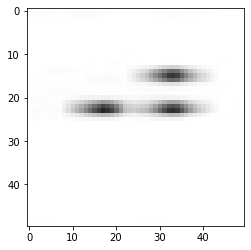

(50, 31, 3)


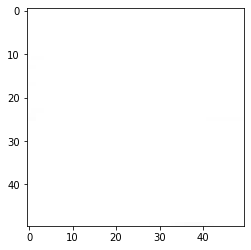

(50, 30, 3)


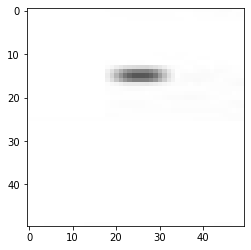

(50, 31, 3)


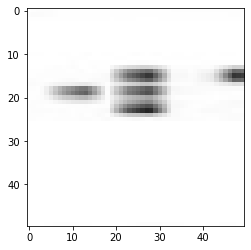

(50, 30, 3)


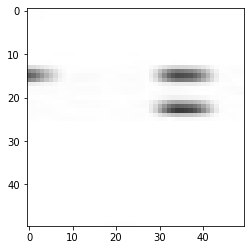

(50, 31, 3)


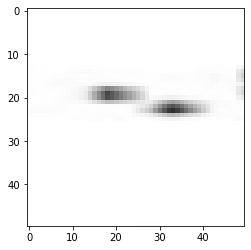

(50, 30, 3)


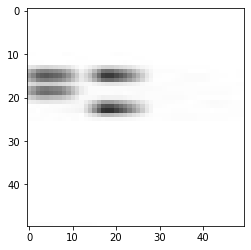

(50, 31, 3)


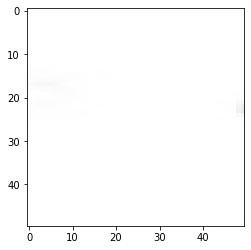

(50, 30, 3)


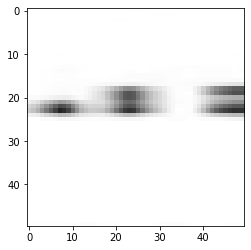

(50, 31, 3)


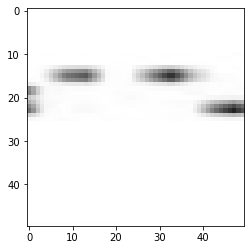

(50, 30, 3)


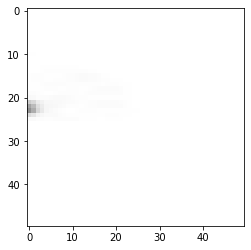

(50, 31, 3)


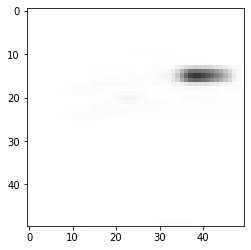

(50, 30, 3)


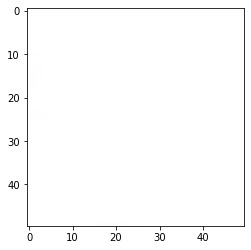

(50, 31, 3)


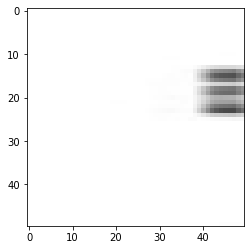

(50, 30, 3)


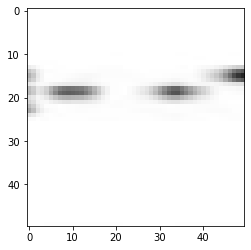

(50, 31, 3)


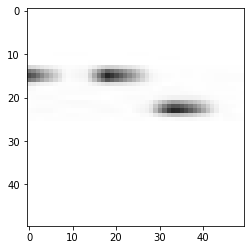

(50, 30, 3)


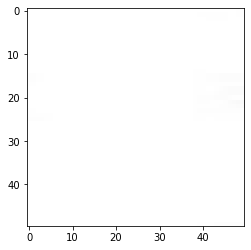

(50, 31, 3)


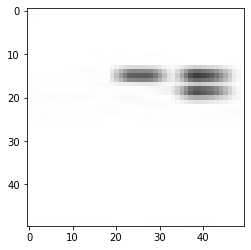

(50, 30, 3)


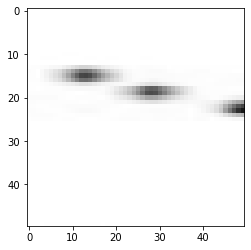

(50, 31, 3)


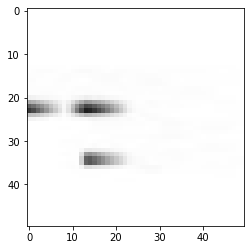

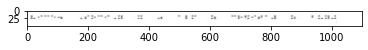

(50, 30, 3)


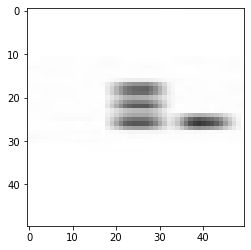

(50, 31, 3)


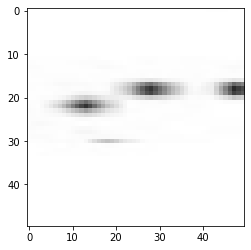

(50, 30, 3)


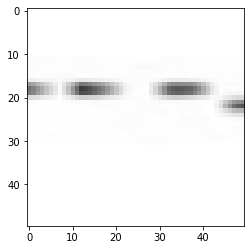

(50, 31, 3)


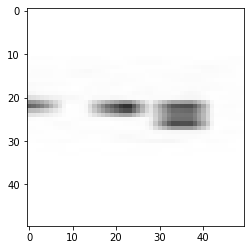

(50, 30, 3)


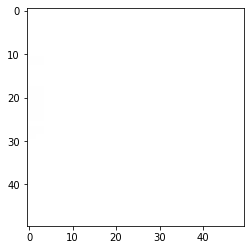

(50, 31, 3)


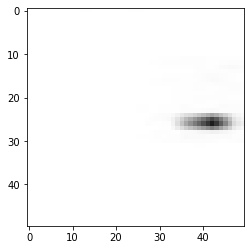

(50, 30, 3)


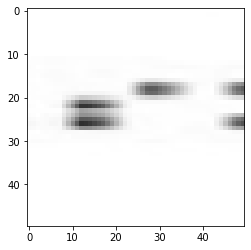

(50, 31, 3)


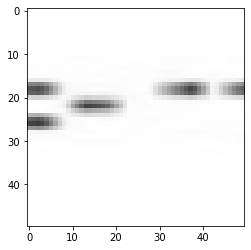

(50, 30, 3)


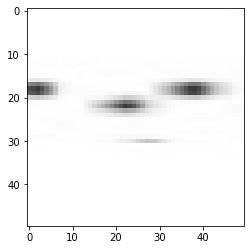

(50, 31, 3)


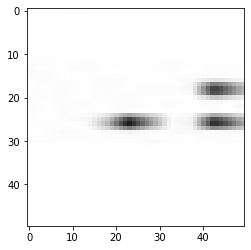

(50, 30, 3)


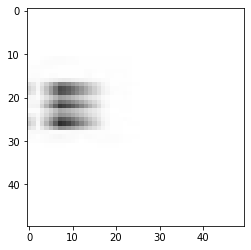

(50, 31, 3)


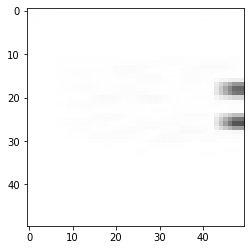

(50, 30, 3)


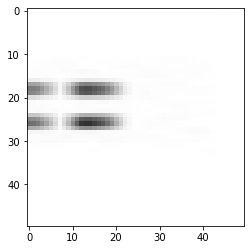

(50, 31, 3)


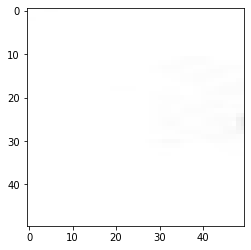

(50, 30, 3)


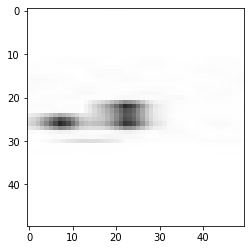

(50, 31, 3)


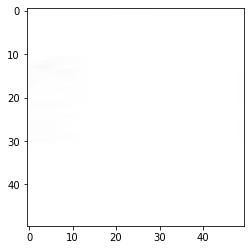

(50, 30, 3)


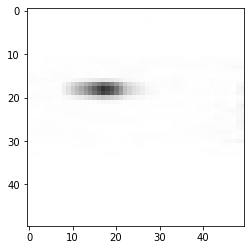

(50, 31, 3)


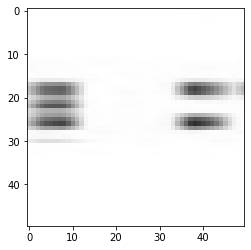

(50, 30, 3)


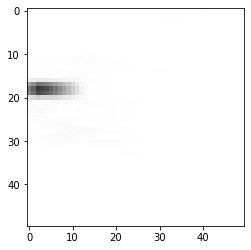

(50, 31, 3)


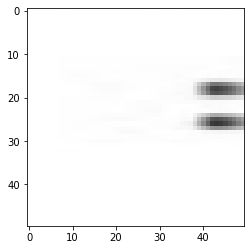

(50, 30, 3)


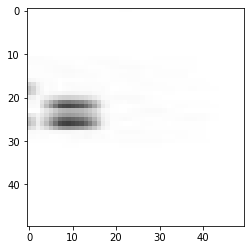

,
(50, 31, 3)


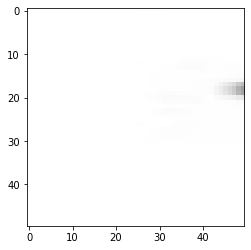

 
(50, 30, 3)


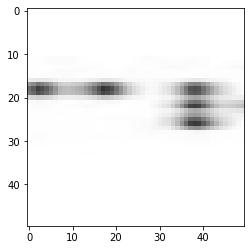

(50, 31, 3)


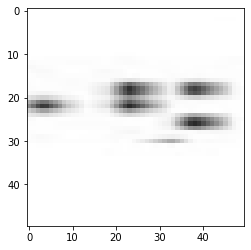

(50, 30, 3)


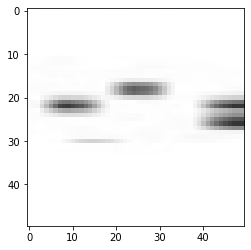

(50, 31, 3)


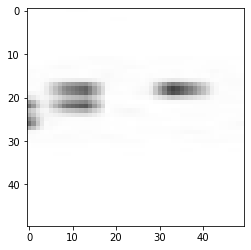

(50, 30, 3)


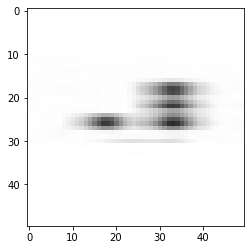

(50, 31, 3)


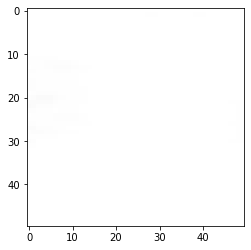

(50, 30, 3)


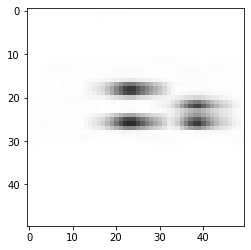

(50, 31, 3)


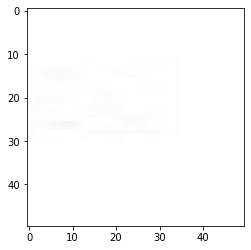

(50, 30, 3)


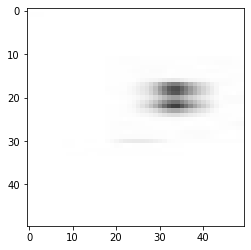

(50, 31, 3)


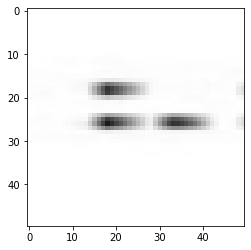

(50, 30, 3)


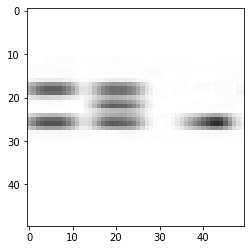

(50, 31, 3)


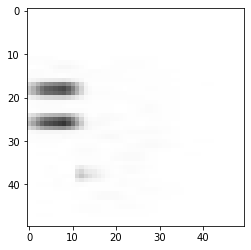

(50, 30, 3)


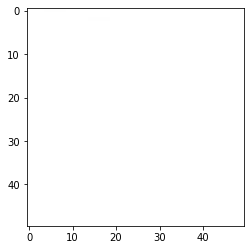

(50, 31, 3)


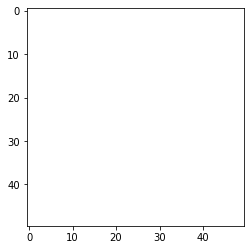

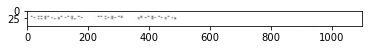

(50, 30, 3)


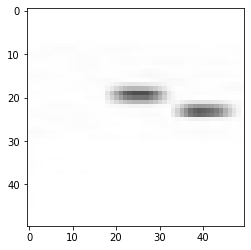

(50, 31, 3)


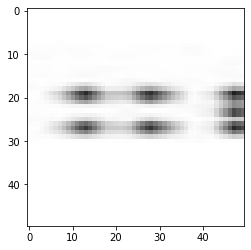

(50, 30, 3)


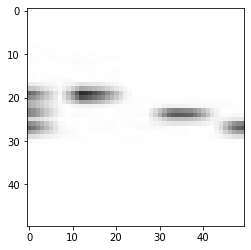

(50, 31, 3)


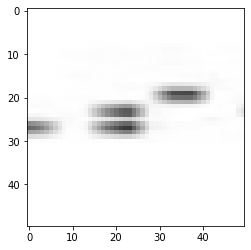

(50, 30, 3)


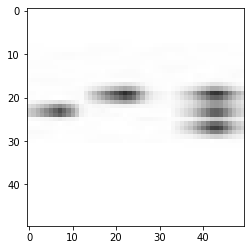

(50, 31, 3)


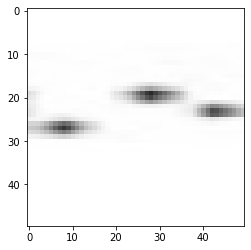

(50, 30, 3)


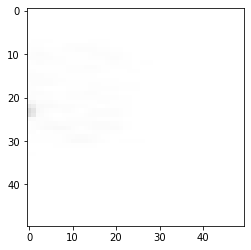

(50, 31, 3)


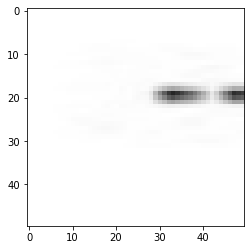

(50, 30, 3)


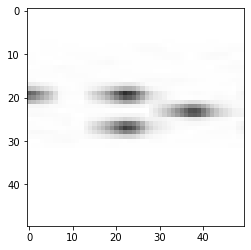

(50, 31, 3)


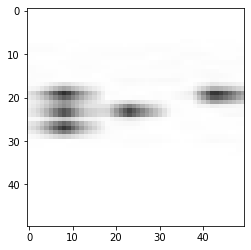

(50, 30, 3)


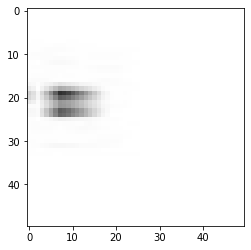

(50, 31, 3)


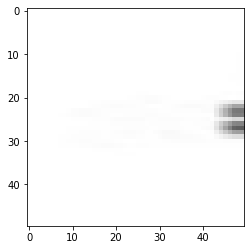

(50, 30, 3)


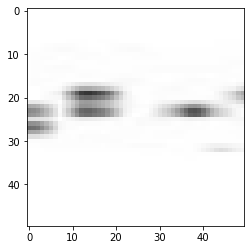

(50, 31, 3)


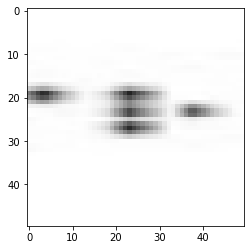

(50, 30, 3)


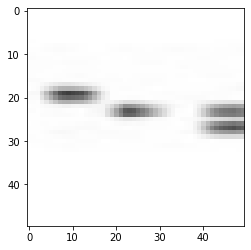

(50, 31, 3)


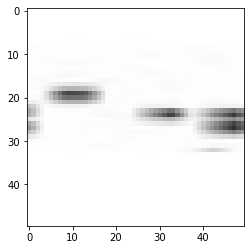

(50, 30, 3)


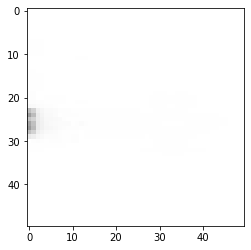

(50, 31, 3)


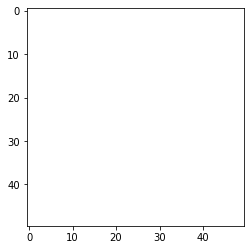

(50, 30, 3)


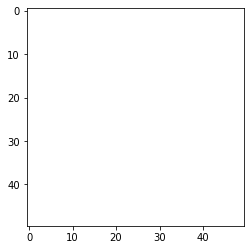

(50, 31, 3)


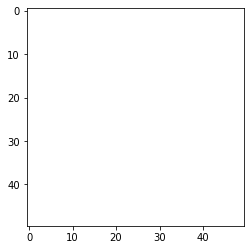

(50, 30, 3)


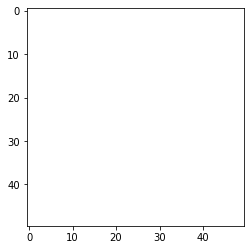

(50, 31, 3)


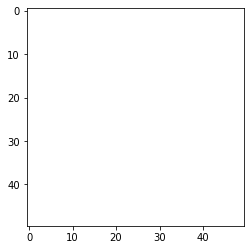

(50, 30, 3)


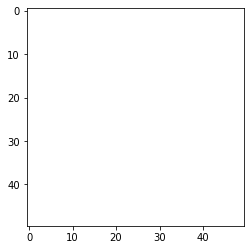

(50, 31, 3)


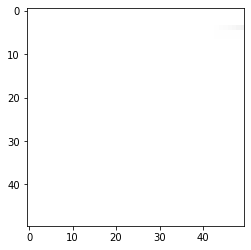

(50, 30, 3)


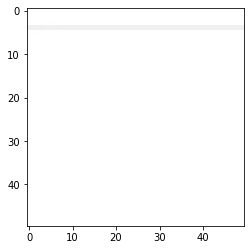

(50, 31, 3)


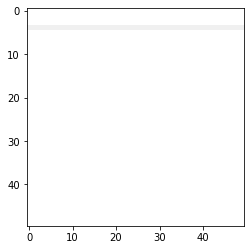

(50, 30, 3)


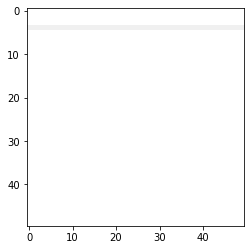

(50, 31, 3)


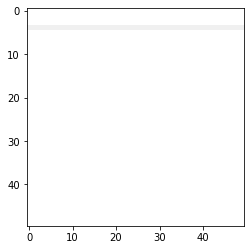

(50, 30, 3)


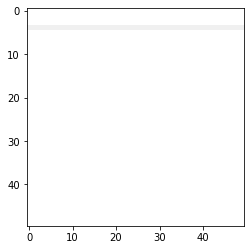

(50, 31, 3)


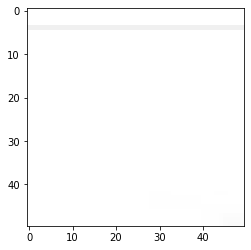

(50, 30, 3)


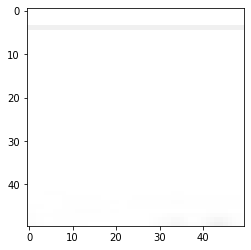

(50, 31, 3)


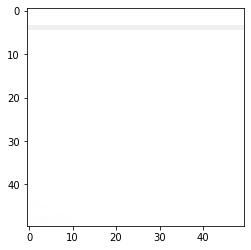

(50, 30, 3)


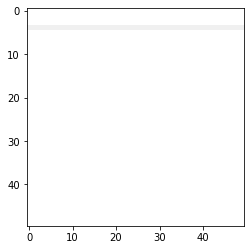

(50, 31, 3)


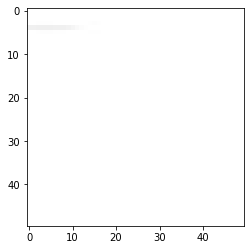

(50, 30, 3)


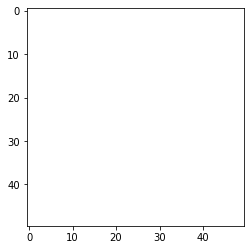

(50, 31, 3)


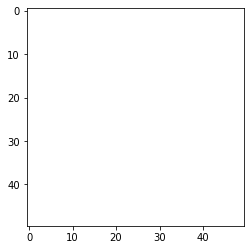

In [174]:
main_text = []
for i in range(0,int(n_chars1)):
    test_img = test_img1.crop((0,i*height_ind1,total_width1,(i+1)*height_ind1))
    test_img = np.array(test_img)
    test_img = cv2.resize(test_img,(test_img.shape[1],50))
    test_img = test_img.astype(np.float32)/255.0
    height,total_width,color = test_img.shape
    n_chars = int(total_width/height/0.60)
    width_ind = total_width/n_chars
    plt.imshow(test_img)
    plt.show()
    text = ""
    num = False
    capital = False
    for j in range(0,int(n_chars)):
        cropped = test_img[0:height,int(j*width_ind):int((j+1)*width_ind),:]
#         cropped = test_img.crop((i*width_ind,0,(i+1)*width_ind,height))
#         cropped = np.array(cropped)
        print(cropped.shape)
        cropped = cv2.resize(cropped,(50,50))
        plt.imshow(cropped)
        plt.show()
        cropped = cropped.reshape(1,50,50,3)
        current = rev_dic[model.predict_classes(cropped)[0]]
        if num == True:
            if current == "period or decimal point":
                current = "."
                text+=current
            elif current == "semicolon":
                current = ";"
                text+=current
            elif current == "question mark":
                current = "?"
                text+=current
            elif current == "hyphen":
                current = "-"
                text+=current
            elif current == "exclamation mark":
                current = "!"
                text+=current
            elif current == "comma":
                current = ","
                text+=current
            elif capital==True:
                current = current.upper()
                capital = False
            elif current == "colon":
                current = ":"
                text+=current
            elif current == "apostrophe":
                current = "′"
                text+=current
            elif current == "space":
                current = " "
                text+=current
                num = False
            elif current == "number":
                current = ""
                text+=current
                continue
            elif current == "capitalize":
                capital = True
                current = ""
                continue
            elif capital == True:
                current = current.upper()
                capital = False
            print(current)
            if ord(current) in range(97,106):
                text+=chr(ord(current)-48)
            elif ord(current) == 106:
                text+=chr(48)
            if current!=" ":
                continue
        if current=="capitalize":
            capital = True
            current = ""
        elif current=="space":
            current = " "
        elif capital==True:
            current = current.upper()
            capital = False
        elif current == "period or decimal point":
            current = "."
        elif current == "semicolon":
            current = ";"
        elif current == "question mark":
            current = "?"
        elif current == "hyphen":
            current = "-"
        elif current == "exclamation mark":
            current = "!"
        elif current == "comma":
            current = ","
        elif current == "colon":
            current = ":"
        elif current == "apostrophe":
            current = "′"
        elif current == "number":
            num =True
            current=""
        text+=current
    main_text.append(text)

In [175]:
main_text

['cc c e cci c ccac cccccc c          ',
 'ccdccccccca eccic cacccccca c       ',
 'ca  ccca acaacc  ceceaicccaa edca   ',
 'cc:cccc ah:, :a i:cc:c:c:a ccfa     ',
 '153:15,  ccc : e: c:e:, :c i dce cc;',
 ':cc: e,cc:, , , ada,  d:cc: : e:hb  ',
 'eg:ici e:,, :e::                    ']

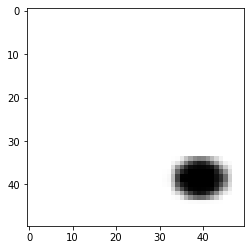

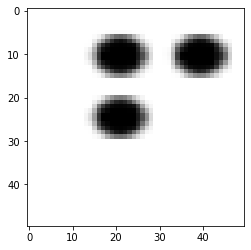

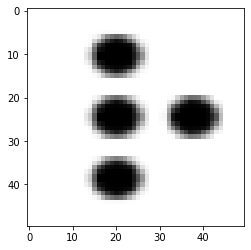

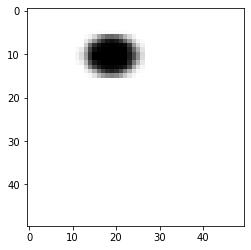

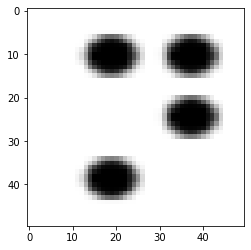

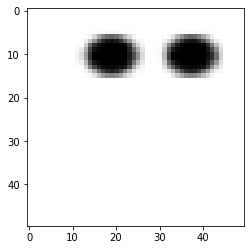

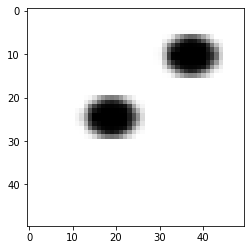

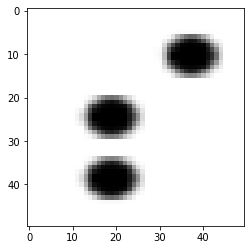

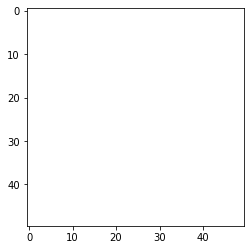

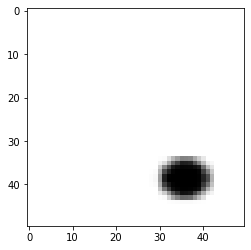

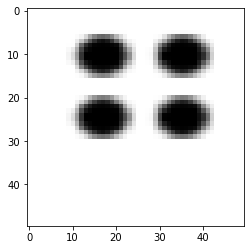

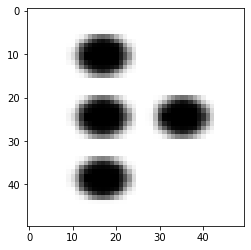

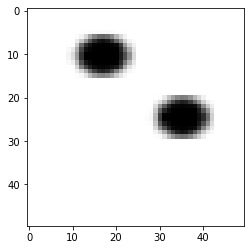

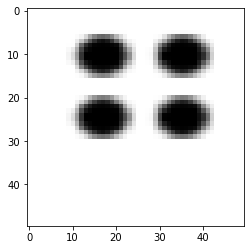

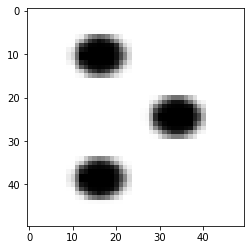

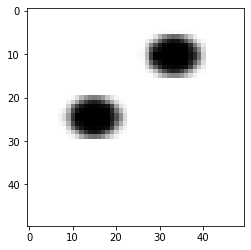

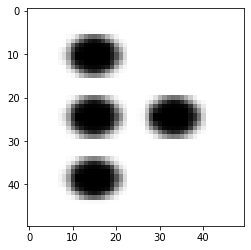

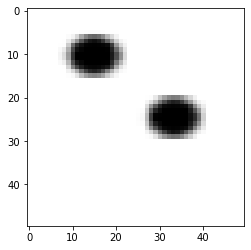

In [108]:
text = ""
num = False
capital = False
for i in range(0,int(n_chars)):
    cropped = test_img.crop((i*width_ind,0,(i+1)*width_ind,height))
    cropped = np.array(cropped)
    cropped = cv2.resize(cropped,(50,50))
    cropped = cropped.astype(np.float32) / 255.0
    plt.imshow(cropped)
    plt.show()
    cropped = cropped.reshape(1,50,50,3)
    current = rev_dic[model.predict_classes(cropped)[0]]
    if num == True:
#         print(current)
        if current == "period or decimal point":
            current = "."
            text+=current
        elif current == "semicolon":
            current = ";"
            text+=current
        elif current == "question mark":
            current = "?"
            text+=current
        elif current == "hyphen":
            current = "-"
            text+=current
        elif current == "exclamation mark":
            current = "!"
            text+=current
        elif current == "comma":
            current = ","
            text+=current
        elif capital==True:
            current = current.upper()
            capital = False
        elif current == "colon":
            current = ":"
            text+=current
        elif current == "apostrophe":
            current = "′"
            text+=current
        elif current == "space":
            current = " "
            text+=current
            num = False
        elif current == "number":
            current = ""
            text+=current
            continue
        elif current == "capitalize":
            capital = True
            current = ""
            continue
        elif capital == True:
            current = current.upper()
            capital = False
        print(current)
        if ord(current) in range(97,106):
            text+=chr(ord(current)-48)
        elif ord(current) == 106:
            text+=chr(48)
        
        
        if current!=" ":
            continue
            
    if current=="capitalize":
        capital = True
        current = ""
    elif current=="space":
        current = " "
    elif capital==True:
        current = current.upper()
        capital = False
    elif current == "period or decimal point":
        current = "."
    elif current == "semicolon":
        current = ";"
    elif current == "question mark":
        current = "?"
    elif current == "hyphen":
        current = "-"
    elif current == "exclamation mark":
        current = "!"
    elif current == "comma":
        current = ","
    elif current == "colon":
        current = ":"
    elif current == "apostrophe":
        current = "′"
    elif current == "number":
        num =True
        current=""
    text+=current

In [109]:
ord(" ")

32

In [110]:
text

'Francis Gregoire'

In [543]:
# !pip install playsound
# !pip install IPython

In [85]:
from gtts import gTTS
from playsound import playsound
import IPython

In [55]:
start_text = "Braille Prediction output is"
tts = gTTS(text)
file_name ="Braille_prediction.wav" 
tts.save(file_name)
sound_file = file_name
IPython.display.Audio("Braille_prediction.wav",autoplay=True)

PermissionError: [Errno 13] Permission denied: 'Braille_prediction.wav'

In [131]:
predict

[array([12], dtype=int64),
 array([8], dtype=int64),
 array([28], dtype=int64),
 array([29], dtype=int64),
 array([20], dtype=int64),
 array([20], dtype=int64),
 array([16], dtype=int64),
 array([28], dtype=int64),
 array([14], dtype=int64),
 array([29], dtype=int64),
 array([28], dtype=int64),
 array([12], dtype=int64),
 array([20], dtype=int64),
 array([18], dtype=int64),
 array([8], dtype=int64),
 array([28], dtype=int64),
 array([29], dtype=int64),
 array([20], dtype=int64),
 array([28], dtype=int64),
 array([21], dtype=int64),
 array([17], dtype=int64),
 array([0], dtype=int64),
 array([34], dtype=int64)]

In [73]:
predict[3][0]

17

In [86]:
chr(33)

'!'

In [106]:
ord("j")

106